# Identifying cards in a deck (Image classificaion)

1.using custom architecture, Resnet
2. seperating the individual class folders into train, test and  
validation folders
3. building the architecture
4. Using ImageDataGenerator
5. compiling
6. training
7. predicting

In [ ]:
!wget https://www.dropbox.com/scl/fo/gabjwf319u2rkdwov0ey9/ABsjFggA94jA6JMf75qLZKQ?rlkey=0g9u1028ock11itehg0x4msnj&dl=0

--2025-01-09 04:27:50--  https://www.dropbox.com/scl/fo/gabjwf319u2rkdwov0ey9/ABsjFggA94jA6JMf75qLZKQ?rlkey=0g9u1028ock11itehg0x4msnj
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc61e2d11763f1a6f1f406b90650.dl.dropboxusercontent.com/zip_download_get/CFM7TuLjRY4JkA42_IGbZ5PhhK6IEacXe4LXDPzPe_P7Kv-lwcMQGOZOIGbxV2ujZ0Exb-4dIYE23tip1eny0cANNbRrTxH2tKAxfbf-7Sv3Eg# [following]
--2025-01-09 04:27:55--  https://uc61e2d11763f1a6f1f406b90650.dl.dropboxusercontent.com/zip_download_get/CFM7TuLjRY4JkA42_IGbZ5PhhK6IEacXe4LXDPzPe_P7Kv-lwcMQGOZOIGbxV2ujZ0Exb-4dIYE23tip1eny0cANNbRrTxH2tKAxfbf-7Sv3Eg
Resolving uc61e2d11763f1a6f1f406b90650.dl.dropboxusercontent.com (uc61e2d11763f1a6f1f406b90650.dl.dropboxusercontent.com)... 162.125.80.15, 2620:100:6016:15::a27d:10f
Connecting to uc61e2d11763f1a6f1f406b90650.dl.dro

 can absolutely specify a custom location for the extracted files when unzipping. By default, when you unzip a file in Colab, it extracts to the current working directory, which is /content/. However, you can control where the files are extracted by specifying a target directory.

In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/ABsjFggA94jA6JMf75qLZKQ?rlkey=0g9u1028ock11itehg0x4msnj'

# Custom location where you want to extract the files
destination_dir = '/content/Radhe/kanu_maan_mohini'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Unzipping the file to the specified location
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(destination_dir)
  print(f"Files have been extracted to {destination_dir}")

Files have been extracted to /content/Radhe/kanu_maan_mohini


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [ ]:

len(os.listdir('/content/Radhe/kanu_maan_mohini/ace of clubs'))

120

In [ ]:
len(os.listdir('/content/Radhe/kanu_maan_mohini/ace of hearts'))

171

In [ ]:
len(os.listdir('/content/Radhe/kanu_maan_mohini/eight of hearts'))

152

In [ ]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
# Define the base path where the card images are stored
base_path = '/content/Radhe/kanu_maan_mohini'

### creating subdirectoreis for train, test and validation set

In [ ]:
# Create new directories for train, test, and validation splits
train_dir = os.path.join(base_path, 'train')
test_dir = os.path.join(base_path, 'test')
val_dir = os.path.join(base_path, 'validation')

In [ ]:
# Create the directories if they don't exist
for dir_path in [train_dir, test_dir, val_dir]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

In [ ]:
os.listdir(base_path)

['eight of spades',
 'jack of diamonds',
 'jack of hearts',
 'six of diamonds',
 'ace of clubs',
 'two of spades',
 'queen of hearts',
 'eight of hearts',
 'two of clubs',
 'six of hearts',
 'six of clubs',
 'test',
 'six of spades',
 'jack of spades',
 'five of diamonds',
 'nine of clubs',
 'ten of spades',
 'queen of spades',
 'king of hearts',
 'four of hearts',
 'four of spades',
 'two of hearts',
 'joker',
 'three of clubs',
 'king of clubs',
 'two of diamonds',
 'three of diamonds',
 'ace of spades',
 'ten of clubs',
 'jack of clubs',
 'queen of diamonds',
 'four of diamonds',
 'five of clubs',
 'king of spades',
 'ten of hearts',
 'nine of diamonds',
 'eight of diamonds',
 'four of clubs',
 'seven of diamonds',
 'five of hearts',
 'seven of clubs',
 'nine of spades',
 'seven of hearts',
 'three of spades',
 'train',
 'eight of clubs',
 'five of spades',
 'king of diamonds',
 'validation',
 'nine of hearts',
 'seven of spades',
 'three of hearts',
 'ten of diamonds',
 'queen of c

### code to move class files into respective directoreis. train, test, validation

In [ ]:
# Iterate over each class directory (e.g., 'ace of clubs', 'eight of clubs', etc.)
for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)

    # Only process directories
    if os.path.isdir(class_path):
        # Create subdirectories for each class within the train, test, validation folders
        class_train_dir = os.path.join(train_dir, class_name)
        class_test_dir = os.path.join(test_dir, class_name)
        class_val_dir = os.path.join(val_dir, class_name)

        # Create these class subdirectories if they don't exist
        for dir_path in [class_train_dir, class_test_dir, class_val_dir]:
            if not os.path.exists(dir_path):
                os.makedirs(dir_path)

        # List all image files in the class directory
        images = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

        # If no images are found, skip this directory
        if len(images) == 0:
            print(f"Warning: No images found in {class_name}, skipping...")  # No deletion
            continue

        print(f"Processing {class_name}: Found {len(images)} images.")

        # Shuffle the images to ensure randomness
        random.shuffle(images)

        # Split the images into 60% train, 20% validation, and 20% test
        try:
            train_images, test_val_images = train_test_split(images, test_size=0.4, random_state=42)
            val_images, test_images = train_test_split(test_val_images, test_size=0.5, random_state=42)
        except ValueError as e:
            print(f"Skipping {class_name} due to error: {e}")
            continue

        # Move images to the respective directories
        for image in train_images:
            shutil.move(os.path.join(class_path, image), os.path.join(class_train_dir, image))
        for image in val_images:
            shutil.move(os.path.join(class_path, image), os.path.join(class_val_dir, image))
        for image in test_images:
            shutil.move(os.path.join(class_path, image), os.path.join(class_test_dir, image))

        print(f"Processed {class_name}: {len(train_images)} train, {len(val_images)} validation, {len(test_images)} test images.")


Processing eight of spades: Found 135 images.
Processed eight of spades: 81 train, 27 validation, 27 test images.
Processing jack of diamonds: Found 160 images.
Processed jack of diamonds: 96 train, 32 validation, 32 test images.
Processing jack of hearts: Found 168 images.
Processed jack of hearts: 100 train, 34 validation, 34 test images.
Processing six of diamonds: Found 139 images.
Processed six of diamonds: 83 train, 28 validation, 28 test images.
Processing ace of clubs: Found 120 images.
Processed ace of clubs: 72 train, 24 validation, 24 test images.
Processing two of spades: Found 155 images.
Processed two of spades: 93 train, 31 validation, 31 test images.
Processing queen of hearts: Found 139 images.
Processed queen of hearts: 83 train, 28 validation, 28 test images.
Processing eight of hearts: Found 152 images.
Processed eight of hearts: 91 train, 30 validation, 31 test images.
Processing two of clubs: Found 130 images.
Processed two of clubs: 78 train, 26 validation, 26 te

### Code to remove empty directories

In [ ]:
import os

# Path to the directory where you want to remove empty folders
directory = '/content/Radhe/kanu_maan_mohini'

# Loop through the directory and its subdirectories
for root, dirs, files in os.walk(directory, topdown=False):
    for dir_name in dirs:
        dir_path = os.path.join(root, dir_name)

        # Check if the directory is empty
        if not os.listdir(dir_path):  # If the directory is empty
            os.rmdir(dir_path)  # Remove the empty directory
            print(f"Deleted empty directory: {dir_path}")


Deleted empty directory: /content/Radhe/kanu_maan_mohini/test/test
Deleted empty directory: /content/Radhe/kanu_maan_mohini/test/train
Deleted empty directory: /content/Radhe/kanu_maan_mohini/test/validation
Deleted empty directory: /content/Radhe/kanu_maan_mohini/train/test
Deleted empty directory: /content/Radhe/kanu_maan_mohini/train/train
Deleted empty directory: /content/Radhe/kanu_maan_mohini/train/validation
Deleted empty directory: /content/Radhe/kanu_maan_mohini/validation/test
Deleted empty directory: /content/Radhe/kanu_maan_mohini/validation/train
Deleted empty directory: /content/Radhe/kanu_maan_mohini/validation/validation
Deleted empty directory: /content/Radhe/kanu_maan_mohini/eight of spades
Deleted empty directory: /content/Radhe/kanu_maan_mohini/jack of diamonds
Deleted empty directory: /content/Radhe/kanu_maan_mohini/jack of hearts
Deleted empty directory: /content/Radhe/kanu_maan_mohini/six of diamonds
Deleted empty directory: /content/Radhe/kanu_maan_mohini/ace of

In [ ]:
len(os.listdir('/content/Radhe/kanu_maan_mohini/test'))

53

In [ ]:
len(os.listdir('/content/Radhe/kanu_maan_mohini/train'))

53

In [ ]:
len(os.listdir('/content/Radhe/kanu_maan_mohini/validation'))

53

#  Building custom architecture

In [ ]:
input = Input(shape=(128,128,3))
x = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(input)
x = MaxPooling2D(pool_size=(2,2))(x)
# x = Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')(x)
# x = MaxPooling2D(pool_size=(2,2))(x)
# x = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(x)
# x = MaxPooling2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x= Dropout(0.2)(x)
# x = Dense(128, activation='relu')(x)
# x = BatchNormalization()(x)
# x= Dropout(0.2)(x)

output = Dense(53, activation='softmax')(x)

model = Model(inputs=input, outputs=output)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 53)                  │           6,837 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,785,589 (64.03 MB)

 Trainable params: 16,785,333 (64.03 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


In [ ]:
train_dir = '/content/Radhe/kanu_maan_mohini/train'
test_dir = '/content/Radhe/kanu_maan_mohini/test'
val_dir = '/content/Radhe/kanu_maan_mohini/validation'

In [ ]:
train_data_gen = ImageDataGenerator(rescale= 1./255,
                                    width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2)


val_data_gen = ImageDataGenerator(rescale= 1./255,
                                  width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2)

test_data_gen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(128,128), batch_size=32, class_mode='categorical')

test_generator = test_data_gen.flow_from_directory(test_dir, target_size=(128,128), batch_size=32, class_mode='categorical')

val_generator = val_data_gen.flow_from_directory(val_dir, target_size=(128,128), batch_size=32, class_mode='categorical')

Found 4552 images belonging to 53 classes.
Found 1544 images belonging to 53 classes.
Found 1528 images belonging to 53 classes.


In [ ]:
history = model.fit(train_generator, epochs=15, validation_data=val_generator,
                    steps_per_epoch=len(train_generator), validation_steps=len(val_generator),
                    callbacks=[early_stopping])

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 141s 965ms/step - accuracy: 0.0333 - loss: 4.0474 - val_accuracy: 0.0609 - val_loss: 3.8878
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 135s 940ms/step - accuracy: 0.0793 - loss: 3.5805 - val_accuracy: 0.0484 - val_loss: 4.0457
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 121us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 138s 953ms/step - accuracy: 0.1090 - loss: 3.4015 - val_accuracy: 0.0884 - val_loss: 3.4484
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 134us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 135s 938ms/step - accuracy: 0.1256 - loss: 3.2485 - val_accuracy: 0.1636 - val_loss: 3.1785
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 136s 947ms/step - accuracy: 0.1277 - loss: 3.162

In [ ]:
model.predict(test_generator, steps=len(test_generator), verbose=0)

array([[3.6625906e-03, 1.8971575e-03, 2.0837947e-03, ..., 1.0801207e-03,
        8.0362806e-04, 3.7548228e-03],
       [4.0891110e-03, 3.6224008e-03, 6.0171923e-03, ..., 4.6492168e-03,
        2.2946114e-03, 2.5126981e-03],
       [1.1414583e-01, 2.7875823e-03, 2.1709062e-03, ..., 9.7477669e-04,
        1.7250158e-03, 3.7535445e-03],
       ...,
       [1.8792234e-04, 4.7873857e-04, 1.1237393e-03, ..., 3.6129760e-04,
        1.3597382e-04, 1.0977000e-04],
       [7.5665891e-02, 3.8535327e-03, 4.7751958e-03, ..., 3.4600031e-03,
        3.8256345e-03, 6.6243690e-03],
       [2.3736295e-04, 5.3628144e-04, 1.1746116e-03, ..., 1.5707552e-03,
        2.0944232e-03, 2.1192986e-03]], dtype=float32)

In [ ]:
# Making predictions on the test data
predictions = model.predict(test_generator)

# using np.argmax() to get the predicted class
predicted_class_indices = np.argmax(predictions, axis=1)

49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step


In [ ]:
predicted_class_indices

array([20, 17, 35, ..., 24, 31, 26])

In [ ]:
true_labels = test_generator.classes
true_labels

array([ 0,  0,  0, ..., 52, 52, 52], dtype=int32)

In [ ]:
pd.DataFrame({'true_labels': true_labels, 'actual_label': predicted_class_indices}).sample(10)

,true_labels,actual_label
1346,46,9
592,19,40
540,18,19
1097,37,3
1404,48,44
1323,45,43
345,11,24
131,4,25
746,25,27
1388,47,0


In [ ]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_class_indices)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.0181


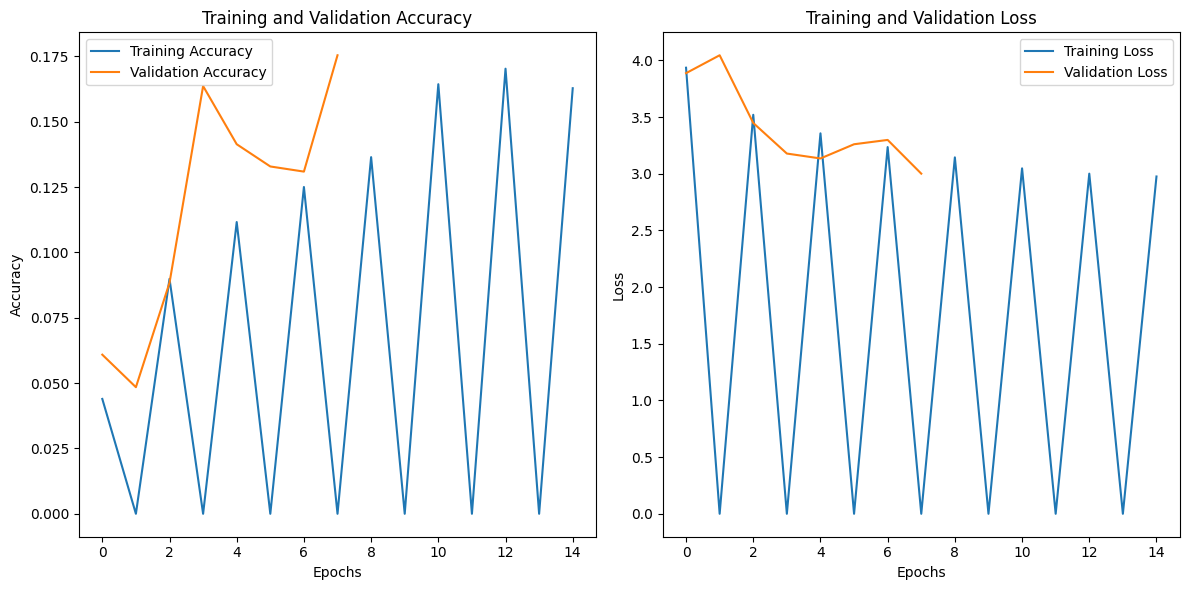

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training logs
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # 'accuracy' instead of 'acc'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # 'val_accuracy' instead of 'val_acc'
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


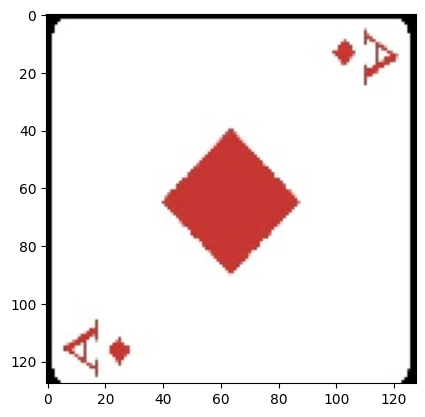

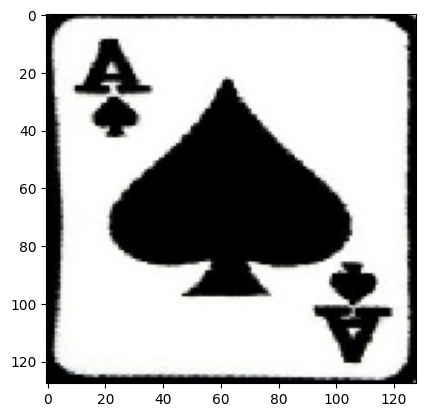

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_path =  ['/content/Radhe/kanu_maan_mohini/test/ace of diamonds/008.jpg',
             '/content/Radhe/kanu_maan_mohini/test/ace of spades/018.jpg']
for img in img_path:
  img = image.load_img(img, target_size=(128,128))
  plt.imshow(img)
  plt.show()



# Inception

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.output

<KerasTensor shape=(None, 8, 8, 2048), dtype=float32, sparse=False, name=keras_tensor_310>

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(53, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,911,381 (83.59 MB)

 Trainable params: 108,597 (424.21 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                        rescale=1./255,
    # rotation_range=10,  # Random rotation
    # width_shift_range=0.2,  # Random horizontal shift
    # height_shift_range=0.2,  # Random vertical shift                  # data augmentation
    # shear_range=0.2,  # Random shear transformation
    # zoom_range=0.2,  # Random zoom
    # horizontal_flip=True,  # Random horizontal flip
    # fill_mode='nearest')  # Fill in any pixels left after transformations
                                    )

val_data_gen =ImageDataGenerator(preprocessing_function=preprocess_input,
                                  rescale=1./255,
    #                              rotation_range=10,  # Random rotation
    # width_shift_range=0.2,  # Random horizontal shift
    # height_shift_range=0.2,  # Random vertical shift
    # shear_range=0.2,  # Random shear transformation
    # zoom_range=0.2,  # Random zoom
    # horizontal_flip=True,  # Random horizontal flip
    # fill_mode='nearest')  # Fill in any pixels left after transformations
                                 )



test_data_gen = ImageDataGenerator(preprocess_input, rescale=1./255 )



In [ ]:
train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(299, 299), batch_size=64, class_mode='categorical')

test_generator = test_data_gen.flow_from_directory(test_dir, target_size=(299, 299), batch_size=64, class_mode='categorical')

val_generator = val_data_gen.flow_from_directory(val_dir, target_size=(299, 299), batch_size=64, class_mode='categorical')


Found 4552 images belonging to 53 classes.
Found 1544 images belonging to 53 classes.
Found 1528 images belonging to 53 classes.


In [ ]:
train_generator.class_indices

{'ace of clubs': 0,
 'ace of diamonds': 1,
 'ace of hearts': 2,
 'ace of spades': 3,
 'eight of clubs': 4,
 'eight of diamonds': 5,
 'eight of hearts': 6,
 'eight of spades': 7,
 'five of clubs': 8,
 'five of diamonds': 9,
 'five of hearts': 10,
 'five of spades': 11,
 'four of clubs': 12,
 'four of diamonds': 13,
 'four of hearts': 14,
 'four of spades': 15,
 'jack of clubs': 16,
 'jack of diamonds': 17,
 'jack of hearts': 18,
 'jack of spades': 19,
 'joker': 20,
 'king of clubs': 21,
 'king of diamonds': 22,
 'king of hearts': 23,
 'king of spades': 24,
 'nine of clubs': 25,
 'nine of diamonds': 26,
 'nine of hearts': 27,
 'nine of spades': 28,
 'queen of clubs': 29,
 'queen of diamonds': 30,
 'queen of hearts': 31,
 'queen of spades': 32,
 'seven of clubs': 33,
 'seven of diamonds': 34,
 'seven of hearts': 35,
 'seven of spades': 36,
 'six of clubs': 37,
 'six of diamonds': 38,
 'six of hearts': 39,
 'six of spades': 40,
 'ten of clubs': 41,
 'ten of diamonds': 42,
 'ten of hearts':

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


In [ ]:
model.fit(train_generator, epochs=10, validation_data= val_generator,
          steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
          callbacks =[early_stopping]
          )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 1583s 22s/step - accuracy: 0.0554 - loss: 3.8494 - val_accuracy: 0.1175 - val_loss: 3.4569
Epoch 2/10
 1/71 ━━━━━━━━━━━━━━━━━━━━ 19:30 17s/step - accuracy: 0.1406 - loss: 3.4260

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 36s 274ms/step - accuracy: 0.1406 - loss: 3.4260 - val_accuracy: 0.1071 - val_loss: 3.4269
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1544s 22s/step - accuracy: 0.1583 - loss: 3.3760 - val_accuracy: 0.1454 - val_loss: 3.2739
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 30s 200ms/step - accuracy: 0.0781 - loss: 3.4469 - val_accuracy: 0.1429 - val_loss: 3.3643
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1555s 22s/step - accuracy: 0.2126 - loss: 3.1597 - val_accuracy: 0.2113 - val_loss: 3.0986
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 30s 204ms/step - accuracy: 0.2344 - loss: 2.9980 - val_accuracy: 0.2500 - val_loss: 3.1031
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1539s 22s/step - accuracy: 0.2620 - loss: 2.9929 - val_accuracy: 0.2486 - val_loss: 3.0049
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 30s 206ms/step - accuracy: 0.2656 - loss: 2.8859 - val_accuracy: 0.2321 - val_loss: 2.9536
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1547s 22s/step - accuracy: 0.3063 - loss: 2.8739 - val_accuracy: 0.230

In [ ]:
predicted_class_indices = np.argmax(model.predict(test_generator), axis=1)
predicted_class_indices

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 402s 16s/step


array([41, 25, 25, ..., 41, 41, 41])

In [ ]:
true_labels = test_generator.classes
true_labels

array([ 0,  0,  0, ..., 52, 52, 52], dtype=int32)

In [ ]:
val_predicted = np.argmax(model.predict(val_generator), axis=1)
true_labels = val_generator.classes

24/24 ━━━━━━━━━━━━━━━━━━━━ 412s 17s/step


In [ ]:
(true_labels == val_predicted).sum()

30

In [ ]:
pd.DataFrame({'true_labels': true_labels, 'actual_label': val_predicted}).sample(30)

,true_labels,actual_label
547,18,31
1399,48,10
1477,51,50
65,2,39
1449,50,3
1229,42,20
1007,34,31
281,9,34
767,26,41
389,13,51


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[33]


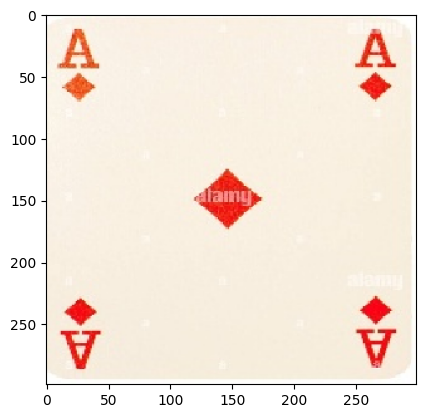

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
[41]


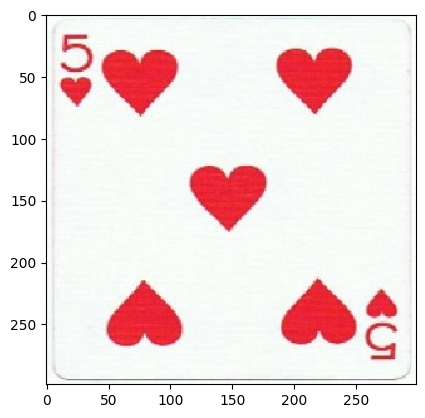

In [ ]:
myim =['/content/Radhe/kanu_maan_mohini/validation/ace of diamonds/012.jpg',
       '/content/Radhe/kanu_maan_mohini/validation/five of hearts/016.jpg']
for img in myim:
  img = image.load_img(img, target_size=(299,299))
  x = image.img_to_array(img)
  x = preprocess_input(x)
  x =np.expand_dims(x, axis=0)
  print(np.argmax(model.predict(x), axis=1))
  plt.imshow(img)
  plt.show()